In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [50]:
# Observacion de los primeros datos de la base de datos

oportunidades = pd.read_csv('Entrenamiento_ECI_2020.csv')
oportunidades['Account_Created_Date'] = pd.to_datetime(oportunidades['Account_Created_Date'])
oportunidades['Opportunity_Created_Date'] = pd.to_datetime(oportunidades['Opportunity_Created_Date'])
oportunidades['Quote_Expiry_Date'] = pd.to_datetime(oportunidades['Quote_Expiry_Date'])
oportunidades['Last_Modified_Date'] = pd.to_datetime(oportunidades['Last_Modified_Date'])
oportunidades['Planned_Delivery_Start_Date'] = pd.to_datetime(oportunidades['Planned_Delivery_Start_Date'])
oportunidades['Planned_Delivery_End_Date'] = pd.to_datetime(oportunidades['Planned_Delivery_End_Date'])
oportunidades.head(5)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [51]:
# Comprobamos campos nulos en la base de datos
oportunidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null object
Territory                             16947 non-null object
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null object
Account_Created_Date                  16947 non-null datetime64[ns]
Source                                16947 non-null object
Billing_Country                       16947 non-null object
Account_Name                          16947 non-null object
Opportunity_Name                      16947 non-null object
Opportunity_ID                        16947 non-n

In [52]:
# Removemos los campos nulos de la base datos

oportunidades = oportunidades.dropna()
oportunidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10115 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    10115 non-null int64
Region                                10115 non-null object
Territory                             10115 non-null object
Pricing, Delivery_Terms_Quote_Appr    10115 non-null int64
Pricing, Delivery_Terms_Approved      10115 non-null int64
Bureaucratic_Code_0_Approval          10115 non-null int64
Bureaucratic_Code_0_Approved          10115 non-null int64
Submitted_for_Approval                10115 non-null int64
Bureaucratic_Code                     10115 non-null object
Account_Created_Date                  10115 non-null datetime64[ns]
Source                                10115 non-null object
Billing_Country                       10115 non-null object
Account_Name                          10115 non-null object
Opportunity_Name                      10115 non-null object
Opportunity_ID                        10115 non-n

In [28]:
# Corroboramos que tenemos en la columna region
oportunidades['Region'].value_counts()

EMEA           3978
APAC           2256
Americas       2187
Japan          1528
Middle East     166
Name: Region, dtype: int64

In [29]:
# Claramente hay un error en los datos en region ya que Japón pertenece a APAC, y Middle East pertenece a EMEA
# Por lo cual pasamos a reemplazar todos los campos en region que contengan a Japón y a Middle East

oportunidades['Region'] = oportunidades['Region'].replace({'Japan':'APAC', 'Middle East':'EMEA'})
oportunidades['Region'].value_counts()

EMEA        4144
APAC        3784
Americas    2187
Name: Region, dtype: int64

In [30]:
# Corroboramos que tenemos en la columna territorio
oportunidades['Territory'].value_counts()

Germany                 1345
None                    1336
NW America               950
India                    782
Japan                    582
Netherlands              509
Australia                484
NE America               467
Singapore                364
France                   318
United Kingdom           301
Belgium                  281
Italy                    269
Spain                    249
SE America               248
China (PRC)              206
Central US               160
Thailand                 149
Austria                  118
Indonesia                 95
Jordan                    93
Philippines               89
SW America                80
Luxembourg                70
Canada                    67
Portugal                  64
Vietnam                   48
Poland                    48
Cyprus                    44
Hungary                   26
                        ... 
Malta                      6
Macedonia                  6
Pakistan                   6
Estonia       

In [31]:
# Se filtraron los paises con valores none por no representar fisicamente ninguna tipo información geografica
# para nuestro objetivo de optimizar los esfuerzos de cada representate comercial
oportunidades = oportunidades.loc[oportunidades['Territory'] != 'None']

In [32]:
# Se condensan las cuatro columnas binarias en una unica que tiene la informacion necesaria
# Basicamente es saber si la oportunidad es posible o no dados los requisitos de aprobación, y su resultado.
# Lo mismo aplica para la burocracia.

filtro_terminos_entrega = oportunidades['Pricing, Delivery_Terms_Quote_Appr']\
     == oportunidades['Pricing, Delivery_Terms_Approved']

filtro_codigo_burocratico = oportunidades['Bureaucratic_Code_0_Approval']\
     == oportunidades['Bureaucratic_Code_0_Approved']

oportunidades = oportunidades.drop(['Pricing, Delivery_Terms_Quote_Appr'\
    ,'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval'\
        , 'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval'], axis = 'columns')

oportunidades_posibles = (filtro_terminos_entrega & filtro_codigo_burocratico)

oportunidades.insert(3,'Es_Oportunidad_Posible', oportunidades_posibles)

oportunidades['Es_Oportunidad_Posible'] = oportunidades['Es_Oportunidad_Posible'].replace(
    {True:1, False:0})
oportunidades

,ID,Region,Territory,Es_Oportunidad_Posible,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
2,27446,Americas,NW America,1,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,...,Q1,2016,NaT,0,USD,83865.60,USD,83865.60,Closed Won,Prod_Category_A_None
4,16805,Americas,NW America,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,...,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.50,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_939,...,Q1,2018,NaT,28,USD,14838277.50,USD,14838277.50,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_8227,...,Q1,2016,NaT,0,USD,50688.00,USD,50688.00,Closed Won,Prod_Category_A_None
23,28524,APAC,India,1,Bureaucratic_Code_4,2015-10-13,None,India,Account_Name_1147,Opportunity_Name_7036,...,Q1,2016,NaT,3,USD,1621851.00,USD,1621851.00,Closed Won,Prod_Category_A_None
24,4915,APAC,India,1,Bureaucratic_Code_4,2015-12-09,None,None,Account_Name_423,Opportunity_Name_3858,...,Q1,2016,NaT,0,USD,221650.00,USD,221650.00,Closed Lost,Prod_Category_A_None
62,18557,EMEA,Italy,1,Bureaucratic_Code_4,2013-07-27,Source_7,Italy,Account_Name_1067,Opportunity_Name_9078,...,Q2,2016,NaT,0,EUR,259875.00,EUR,259875.00,Closed Lost,Prod_Category_A_None
63,13392,EMEA,Germany,1,Bureaucratic_Code_4,2013-07-27,Source_7,Germany,Account_Name_263,Opportunity_Name_4062,...,Q1,2016,NaT,0,EUR,103350.00,EUR,103350.00,Closed Won,Prod_Category_A_None
66,18491,EMEA,United Kingdom,1,Bureaucratic_Code_4,2014-01-08,None,United Kingdom,Account_Name_270,Opportunity_Name_2804,...,Q1,2016,NaT,0,EUR,214500.00,EUR,214500.00,Closed Won,Prod_Category_A_None
67,18494,EMEA,United Kingdom,1,Bureaucratic_Code_4,2014-01-08,None,United Kingdom,Account_Name_270,Opportunity_Name_2801,...,Q1,2016,NaT,0,EUR,214500.00,EUR,214500.00,Closed Won,Prod_Category_A_None


In [33]:
# Analizamos los territorios en los cuales son factibles las oportunidades por cumplir las condiciones
# necesarias a priori

oportunidades_factibles_trtr = oportunidades.groupby('Territory').agg({'Es_Oportunidad_Posible': 'sum'})
oportunidades_factibles_trtr = oportunidades_factibles_trtr.rename(columns = {'Es_Oportunidad_Posible'
                                                                         :'Oportunidades_Posibles'})

In [34]:
# Analizamos los territorios en los cuales no son factibles las oportunidades por no cumplir las condiciones
# necesarias a priori

def contar_ceros(x):
    return (x.count() - x.sum())

oportunidades_no_factibles_trtr = oportunidades.groupby('Territory').agg({'Es_Oportunidad_Posible': contar_ceros})
oportunidades_no_factibles_trtr = oportunidades_no_factibles_trtr.rename(columns = {'Es_Oportunidad_Posible'
                                                                         :'Oportunidades_No_Posibles'})

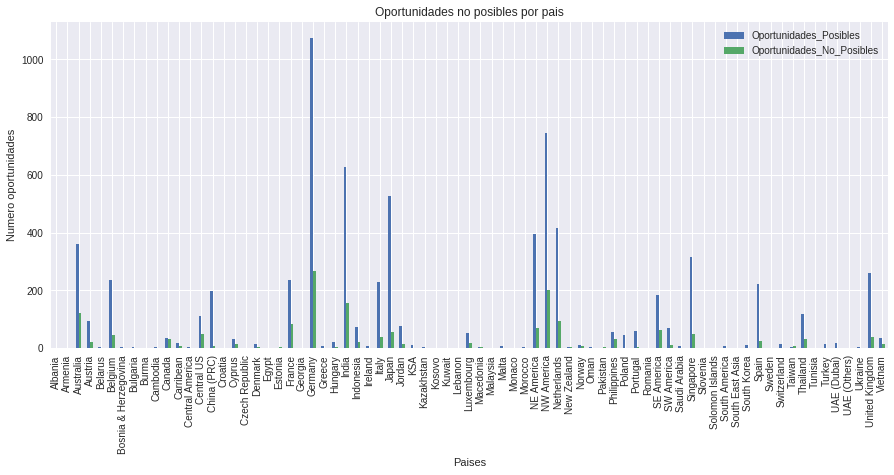

In [35]:
# Gráfico de barras preliminar para tener una vision de en cuales paises tenemos mayor probabilidad
# de al menos conseguir una oportunidad 
# Con esto nos damos cuenta que paises como alemania, japan, india tienen una gran cantidad de
# oportunidades aceptadas en cuanto a requisitos en, relacion a las oportunidades que no fueron aceptadas

oportunidades_posibles_por_territorio = oportunidades_factibles_trtr[['Oportunidades_Posibles']]
oportunidades_posibles_por_territorio['Oportunidades_No_Posibles'] \
    = oportunidades_no_factibles_trtr['Oportunidades_No_Posibles']

oportunidades_posibles_por_territorio.plot(kind = 'bar', title = 'Oportunidades no posibles por pais'\
    , linewidth = 4, figsize = (15,6))
ax = plt.gca()
ax.set_ylabel('Numero oportunidades')
ax.set_xlabel('Paises')
plt.show()

In [36]:
#Analizamos la cantidad de valores únicos de países que poseemos

oportunidades['Territory'].describe()

count        8779
unique         75
top       Germany
freq         1345
Name: Territory, dtype: object

In [37]:
# Filtramos los paises que tengan una cantidad razonable para analizar, ya que en el gráfico de barras se ve que hay países
# poco razonables, y no es muy entendible.

cota = oportunidades['Territory'].value_counts().mean()/2
Cantidad_Paises = oportunidades.agg({'Territory': 'value_counts'})
Cantidad_Paises = Cantidad_Paises.reset_index()
Cantidad_Paises = Cantidad_Paises.rename({'Territory':'Cantidad_Paises'}, axis = 'columns')
oportunidades = oportunidades.merge(Cantidad_Paises, left_on='Territory', right_on='index')
oportunidades = oportunidades.loc[oportunidades.Cantidad_Paises >= cota]
oportunidades.Territory.value_counts()

Germany           1345
NW America         950
India              782
Japan              582
Netherlands        509
Australia          484
NE America         467
Singapore          364
France             318
United Kingdom     301
Belgium            281
Italy              269
Spain              249
SE America         248
China (PRC)        206
Central US         160
Thailand           149
Austria            118
Indonesia           95
Jordan              93
Philippines         89
SW America          80
Luxembourg          70
Canada              67
Portugal            64
Name: Territory, dtype: int64

In [38]:
# Con el describe podemos darnos cuenta de que de los 71 países originales, logramos quedarnos con 25 que son razonables para el
# análisis

oportunidades['Territory'].describe()

count        8340
unique         25
top       Germany
freq         1345
Name: Territory, dtype: object

In [39]:
#Obtenemos las oportunidades posibles y no posibles a partir de las condiciones de aprobación en el nuevo dataset.

oportunidades_factibles_trtr = oportunidades.groupby('Territory').agg({'Es_Oportunidad_Posible': 'sum'})
oportunidades_factibles_trtr = oportunidades_factibles_trtr.rename(columns = {'Es_Oportunidad_Posible'
                                                                         :'Oportunidades_Posibles'})

oportunidades_no_factibles_trtr = oportunidades.groupby('Territory').agg({'Es_Oportunidad_Posible': contar_ceros})
oportunidades_no_factibles_trtr = oportunidades_no_factibles_trtr.rename(columns = {'Es_Oportunidad_Posible'
                                                                         :'Oportunidades_No_Posibles'})

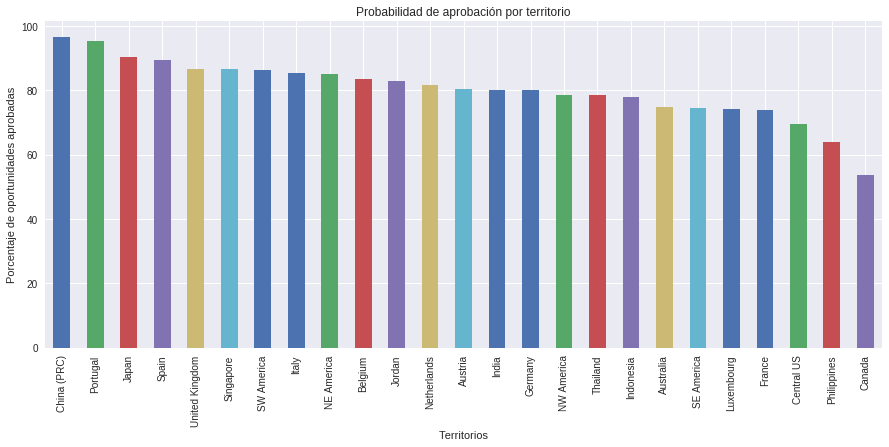

Territory
China (PRC)       96.60
Portugal          95.31
Japan             90.38
Spain             89.56
United Kingdom    86.71
Singapore         86.54
SW America        86.25
Italy             85.50
NE America        85.01
Belgium           83.63
Jordan            82.80
Netherlands       81.73
Austria           80.51
India             80.18
Germany           80.00
NW America        78.63
Thailand          78.52
Indonesia         77.89
Australia         74.79
SE America        74.60
Luxembourg        74.29
France            73.90
Central US        69.38
Philippines       64.04
Canada            53.73
dtype: float64

In [40]:
#Obtenemos el ratio de Aprobadas/No aprobadas para poder armar el nuevo gráfico de barras.

oportunidades_posibles_por_territorio = oportunidades_factibles_trtr[['Oportunidades_Posibles']]
oportunidades_posibles_por_territorio['Oportunidades_No_Posibles'] \
    = oportunidades_no_factibles_trtr['Oportunidades_No_Posibles']

oportunidades_ratio = (oportunidades_posibles_por_territorio['Oportunidades_Posibles']*100/
        (oportunidades_posibles_por_territorio['Oportunidades_Posibles']+\
         oportunidades_posibles_por_territorio['Oportunidades_No_Posibles'])).round(2)

oportunidades_ratio = oportunidades_ratio.sort_values(ascending=False)

#Realizamos el gráfico de barras.

oportunidades_ratio.plot(kind = 'bar', title = 'Probabilidad de aprobación por territorio', linewidth = 4, figsize = (15,6))
ax = plt.gca()
ax.set_ylabel('Porcentaje de oportunidades aprobadas')
ax.set_xlabel('Territorios')
plt.show()
oportunidades_ratio

In [41]:
# Quitamos aquellas filas en donde no se haya dado la aprobación, ya que la única razón para tenerlas es para saber
# la probabilidad de aprobación por territorio.

oportunidades = oportunidades.loc[oportunidades['Es_Oportunidad_Posible'] == 1]
oportunidades = oportunidades.drop('Es_Oportunidad_Posible', axis = 'columns')
oportunidades = oportunidades.reset_index()
oportunidades = oportunidades.drop('level_0', axis = 'columns')
oportunidades

,ID,Region,Territory,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,index,Cantidad_Paises
0,27446,Americas,NW America,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,...,NaT,0,USD,83865.60,USD,83865.60,Closed Won,Prod_Category_A_None,NW America,950
1,27455,Americas,NW America,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_8227,7,...,NaT,0,USD,50688.00,USD,50688.00,Closed Won,Prod_Category_A_None,NW America,950
2,21527,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1828,631,...,NaT,0,USD,2814.00,USD,2814.00,Closed Won,Prod_Category_A_None,NW America,950
3,21530,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1830,632,...,NaT,0,USD,55300.00,USD,55300.00,Closed Won,Prod_Category_A_None,NW America,950
4,21534,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1829,633,...,NaT,0,USD,103068.00,USD,103068.00,Closed Won,Prod_Category_A_None,NW America,950
5,21262,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1831,651,...,NaT,0,USD,6261.15,USD,6261.15,Closed Won,Prod_Category_A_None,NW America,950
6,20715,Americas,NW America,Bureaucratic_Code_4,2013-08-22,Source_7,United States,Account_Name_1319,Opportunity_Name_784,666,...,NaT,26,USD,11699910.00,USD,11699910.00,Closed Lost,Prod_Category_A_None,NW America,950
7,21560,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1832,667,...,NaT,0,USD,5027.40,USD,5027.40,Closed Won,Prod_Category_A_None,NW America,950
8,23216,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1833,749,...,NaT,0,USD,5443.20,USD,5443.20,Closed Won,Prod_Category_A_None,NW America,950
9,20793,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1834,770,...,NaT,0,USD,72800.00,USD,72800.00,Closed Won,Prod_Category_A_None,NW America,950


In [42]:
##################################################################################################################
##################################################################################################################
#    LO DE ARRIBA IRIA BASICAMENTE TODO LO RELACIONADO A CASTEOS Y LIMPIEZA DE DATOS APARTIR DE ABAJO SE PUEDE   #
#              COMENZAR A ANALIZAR LA BASE DE DATOS EN FUNCION AL TARGET QUE TENEMOS QUE ES EL STAGE             #
#      SI DEBEMOS CASTEAR ALGO MAS O FILTRAR ALGO NUEVO LO HAREMOS ARRIBA PARA SEPARAR DEL ANALISIS DEL TARGET   #
##################################################################################################################
##################################################################################################################

In [43]:
# Agrupamos por territorio, y analizamos la cantidad de Closed Won y Closed Lost obtenidos por país.
# Dado que los negotiations y proposals son ínfimos en comparacion con los Closed, los tiramos.

oportunidades_stage = oportunidades.groupby('Territory').agg({'Stage':'value_counts'})
oportunidades_stage = oportunidades_stage.unstack()
oportunidades_stage.columns = ['Closed Lost', 'Closed Won', 'a', 'b']
oportunidades_stage = oportunidades_stage.drop(['a','b'], axis='columns')

#Calculamos la probabilidad de que la oportunidad finalice en un closed won por territorio.

oportunidades_stage_ratio = oportunidades_stage['Closed Won']*100/(oportunidades_stage['Closed Won']+oportunidades_stage['Closed Lost'])
oportunidades_stage_ratio = oportunidades_stage_ratio.sort_values(ascending = False)

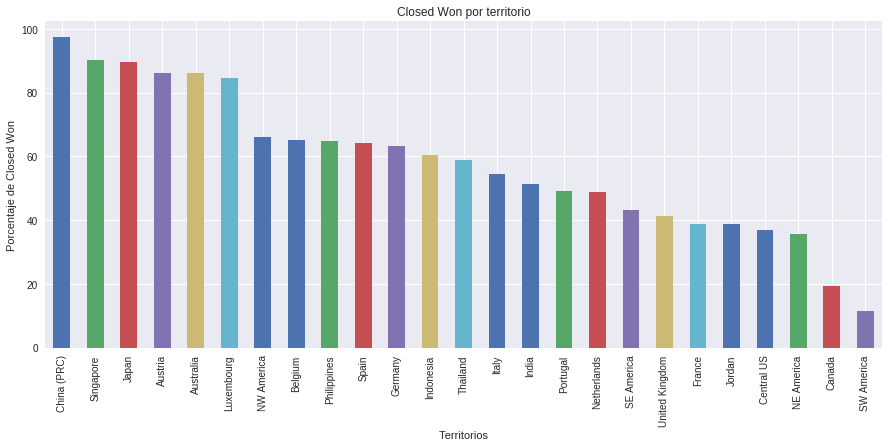

In [44]:
#Graficamos las probabilidades de que haya un closed won en cada territorio dada la aprobación del proyecto previamente.

oportunidades_stage_ratio.plot(kind = 'bar', title = 'Closed Won por territorio', linewidth = 4, figsize = (15,6))
ax = plt.gca()
ax.set_ylabel('Porcentaje de Closed Won')
ax.set_xlabel('Territorios')
plt.show()

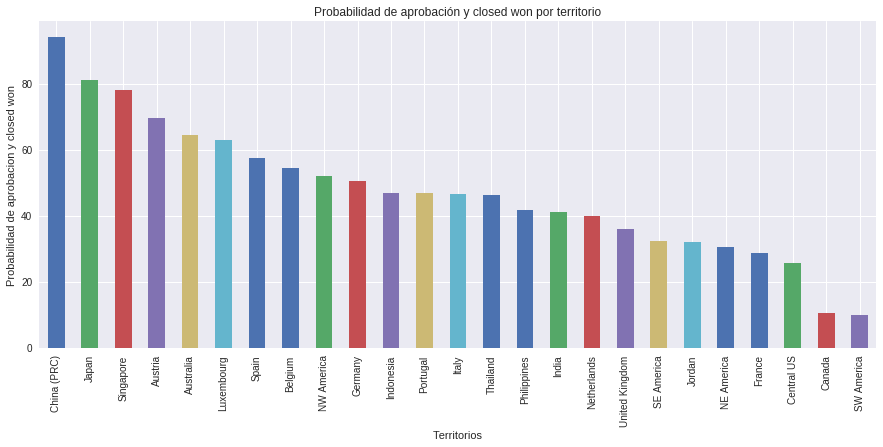

Territory
China (PRC)       94.17
Japan             81.08
Singapore         78.02
Austria           69.49
Australia         64.46
Luxembourg        62.86
Spain             57.43
Belgium           54.45
NW America        52.07
Germany           50.56
Indonesia         46.95
Portugal          46.87
Italy             46.47
Thailand          46.31
Philippines       41.57
India             41.11
Netherlands       39.98
United Kingdom    35.88
SE America        32.26
Jordan            32.02
NE America        30.41
France            28.62
Central US        25.63
Canada            10.45
SW America        10.00
dtype: float64

In [45]:
# Ahora conociendo la probabilidad de aprobacion, y la probabilidad de que haya closed won dada la aprobación,
# podemos obtener la probabilidad total multiplicando las mismas.

probabilidad_total_closed_won = oportunidades_ratio*oportunidades_stage_ratio/100
probabilidad_total_closed_won = probabilidad_total_closed_won.round(2)
probabilidad_total_closed_won = probabilidad_total_closed_won.sort_values(ascending = False)

# Graficamos las probabilidades para todos los territorios presentes

probabilidad_total_closed_won.plot(kind = 'bar', title = 'Probabilidad de aprobación y closed won por territorio', linewidth = 4, figsize = (15,6))
ax = plt.gca()
ax.set_ylabel('Probabilidad de aprobacion y closed won')
ax.set_xlabel('Territorios')
plt.show()
probabilidad_total_closed_won

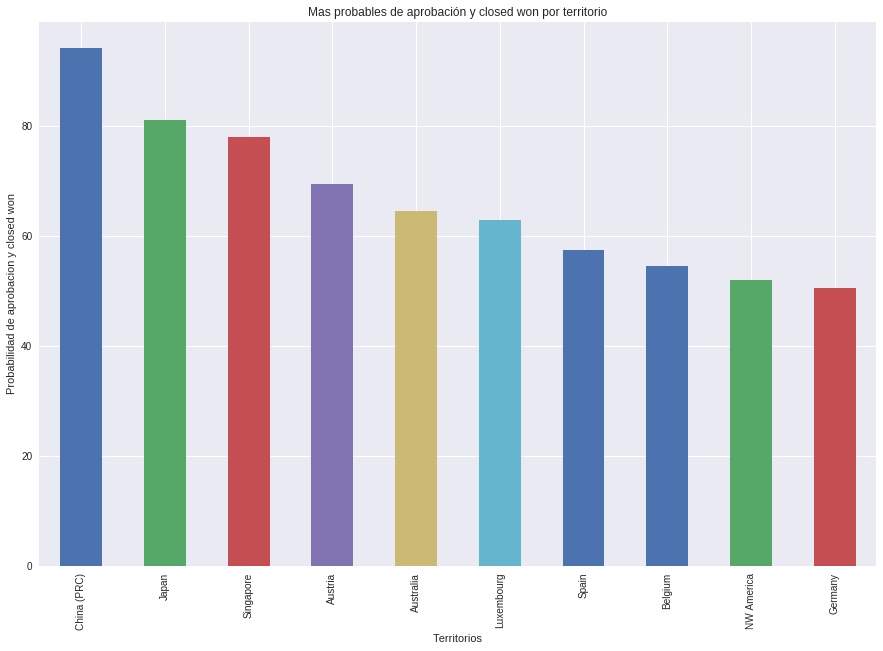

Territory
China (PRC)    94.17
Japan          81.08
Singapore      78.02
Austria        69.49
Australia      64.46
Luxembourg     62.86
Spain          57.43
Belgium        54.45
NW America     52.07
Germany        50.56
dtype: float64

In [54]:
# Entonces, a nosotros nos interesan los mejores países para invertir (Los más probables de obtener un closed won, y de que nos
# acepten).

probabilidad_total_closed_won_top_10 = probabilidad_total_closed_won.nlargest(10)

probabilidad_total_closed_won_top_10.plot(kind = 'bar', title = 'Mas probables de aprobación y closed won por territorio',\
                                          linewidth = 4, figsize = (15,10))
ax = plt.gca()
ax.set_ylabel('Probabilidad de aprobacion y closed won')
ax.set_xlabel('Territorios')
plt.show()
probabilidad_total_closed_won_top_10